In [129]:
import numpy as np
from scipy.misc import imread
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

GREYSCALE = 1
COLOR = 2
RGBDIM = 3


def is_valid_args(filename: str, representation: int) -> bool:
    return (filename is not None) and \
           (representation == 1 or representation == 2) and \
           isinstance(filename, str)


def read_image(filename: str, representation: int) -> np.ndarray:
    """
    Reads a given image file and converts it into a given representation
    :param filename: string containing the image filename to read.
    :param representation: representation code, either 1 or 2 defining if the output should be either a
    greyscale image (1) or an RGB image (2)
    :return: Image represented by a matrix of class np.float32, normalized to the range [0, 1].
    """
    if not is_valid_args(filename, representation):
        raise Exception("Please provide valid filename and representation code")

    try:
        im = imread(filename).astype(np.float32) / 255
    except OSError:
        raise Exception("Filename should be valid image filename")

    if (im.ndim == RGBDIM) and (representation == GREYSCALE):  # change rgb to greyscale
        im = rgb2gray(im).astype(np.float32)
    elif (im.ndim != RGBDIM) and (representation == COLOR):
        raise Exception("Converting greyscale to RGB is not supported")

    return im


def imdisplay(filename: str, representation: int) -> None:
    """
    display a given image with the given representation code
    :param filename: string containing the image filename to read.
    :param representation: representation code, either 1 or 2 defining if the output should be either a
    greyscale image (1) or an RGB image (2)
    """
    try:
        plt.imshow(read_image(filename, representation), cmap=plt.cm.gray)
    except:
        raise
    else:
        plt.show()



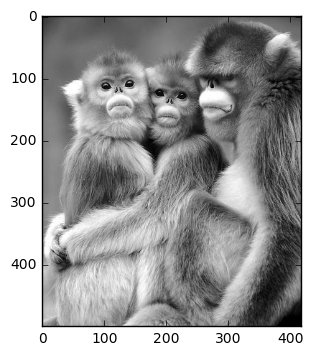

In [132]:
imdisplay('C:\\Users\\mott\\Google Drive\\Studies\\fourthYear\\Semester1\\
ImageProcessing\\Exs\\ex1\\tests\\external\\monkeyG.jpg',1)